# Titanic dataset
https://www.kaggle.com/c/titanic/data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.linear_model import LogisticRegression

In [2]:
# getting the data
train_df = pd.read_csv("titanic/train.csv")
test_df = pd.read_csv("titanic/test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### observations
- 891 instances
- 11 features + the target variable (survived)
- 2 : floats, 5 : integers, 5 : objects

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId : 乗客識別ユニークID
- Survived : 生存ラベル（0=死亡、1=生存)
- Pclass : チケットクラス
- Name : 乗客の名前
- Sex : 性別（male=男性、female＝女性）
- Age : 年齢
- SibSp : タイタニックに同乗している兄弟/配偶者の数
- parch : タイタニックに同乗している親/子供の数
- ticket : チケット番号
- fare : 料金
- cabin : 客室番号
- Embarked : 出港地

ここで，

- pclass
  - 1 : 上層クラス
  - 2 : 中級クラス
  - 3 : 下層クラス
- Embarked
   - C = Cherbourg
   - Q = Queenstown
   - S = Southampton
   
 

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


observation
- 38%の人が助かっている

In [6]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


observation
- たくさんのカテゴリ変数が存在
- AgeをみるとNaN (欠損値) があったりする

### 欠損データのカウント

In [7]:
total = train_df.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

observation
- Cabinは77\%が存在しないため，dropしてしまっても良さそう
- Embarkedは2つだけnullなので容易に埋め合わせできそう
- Ageはうまくやらないといけない．．

## exploratory data analysis (EDA) フェーズ
- データから知見を得る作業

- 「この変数絶対いらないよね？」
- 「あの変数入れた方がいいんじゃない？」
- 「このデータバグってない？」

などなど．．．本番環境でのモデルの想定外の挙動を防ぐためにも大事なフェーズ
Kaggleのkernelをみるのがおすすめ : https://www.kaggle.com/c/titanic/kernels

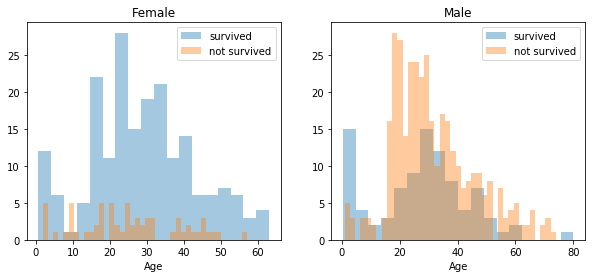

In [8]:
# Age and Sex:
train_df = train_df.drop('Cabin', axis=1)
test_df = test_df.drop('Cabin', axis=1)

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

/Users/a14752/.pyenv/versions/3.7.1/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


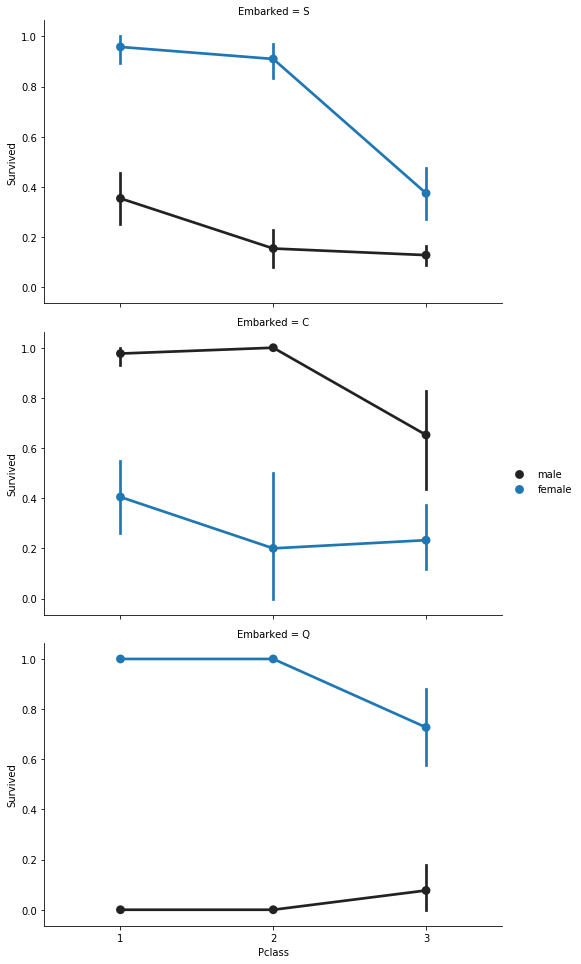

In [9]:
# Embarked, Pclass and Sex:

FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

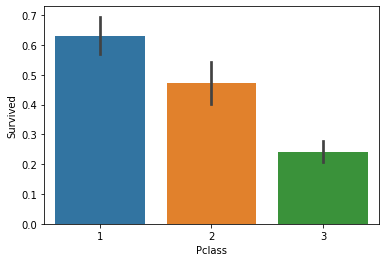

In [10]:
# Pclass:

sns.barplot(x='Pclass', y='Survived', data=train_df)

In [11]:
train_df = train_df.drop('PassengerId', axis=1)

In [12]:
# age 欠損値
data = [train_df, test_df]

mean = train_df['Age'].mean()
print('mean:{}'.format(mean))
for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(mean).astype(int)

mean:29.69911764705882


In [13]:
train_df["Age"].isnull().sum()

0

In [14]:
# Embarked
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [16]:
# 欠損値がないか確認
print(train_df.info())

print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 32.7+ 

observation
- 4つのcategorical featureが存在． (1) Name, (2) Sex, (3) Ticket, (4) Embarked
これらを数値的に扱えるように変換する必要がある
- 簡単のため，Nameは省略してそれ以外について変換する
- Fare, test_dfに1件nullがある

In [17]:
train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop('Name', axis=1)

In [18]:
# Sex:

genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [19]:
# Ticket:

train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

observation
- ほぼuniqueで扱いづらい．．．
- dropする

In [20]:
train_df = train_df.drop('Ticket', axis=1)
test_df = test_df.drop('Ticket', axis=1)

In [21]:
# Embarked:

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [22]:
# Fareのnull埋め
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [23]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# trainについてaccuracyを計算
print('accuracy : {}'.format(lr.score(X_train, y_train)))

accuracy : 0.8002244668911336


/Users/a14752/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
